In [1]:
from lma.resample import *
from lma.plot import *

In [2]:
dataset = 'rat_retina'

In [27]:
all_trees_sorted = read_dataset(f'datasets/{dataset}.txt')

# print the first ten trees
all_trees_sorted[:10]

['((R,R),((A,B),((A,R),(B,M))))',
 '(R,((R,R),((R,R),((B,(R,R)),((B,M),(R,R))))))',
 '((A,R),((R,(M,R)),R))',
 '(R,(M,R))',
 '(R,(M,R))',
 '(B,(M,(R,R)))',
 '(R,(R,(R,(M,R))))',
 '(B,(B,M))',
 '(((R,(R,R)),M),R)',
 '(A,(M,R))']

## Doublet motif analysis

In [5]:
num_resamples = 10000

In [6]:
(doublet_dict, 
 cell_fates, 
 dfs_concat) = resample_trees_doublets(all_trees_sorted, 
                                       num_resamples, 
                                       True, 
                                       cell_fates='auto'
                                       )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [7]:
doublet_dict

{'(A,A)': 0,
 '(A,B)': 1,
 '(A,M)': 2,
 '(A,R)': 3,
 '(B,B)': 4,
 '(B,M)': 5,
 '(B,R)': 6,
 '(M,M)': 7,
 '(M,R)': 8,
 '(R,R)': 9}

In [8]:
cell_fates

['A', 'B', 'M', 'R']

In [21]:
dfs_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,observed,expected
0,2.0,1.0,1.0,2.0,0.0,5.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.468910
1,2.0,4.0,8.0,5.0,7.0,2.0,2.0,5.0,3.0,3.0,...,2.0,0.0,2.0,2.0,6.0,1.0,6.0,3.0,12.0,3.655953
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.783419
3,23.0,21.0,24.0,23.0,16.0,27.0,25.0,22.0,26.0,18.0,...,28.0,22.0,25.0,17.0,14.0,20.0,18.0,24.0,15.0,21.609295
4,3.0,0.0,5.0,4.0,2.0,0.0,1.0,1.0,1.0,2.0,...,1.0,4.0,2.0,2.0,0.0,4.0,2.0,2.0,4.0,2.274815


In [10]:
cutoff = None

In [11]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_zscores_i_concat_melt_subset, 
 df_zscores_i_concat_melt_100resamples_subset) = dfs_for_plotting(dfs_concat, 
                                                                  num_resamples, 
                                                                  doublet_dict, 
                                                                  cutoff=cutoff, 
                                                                  num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [22]:
df_true_melt_subset.head()

,subtree_val,observed,expected,z-score,abs z-score,label,min,mean,max,adj_p_val,z-score min,z-score mean,z-score max
1,1,12.0,3.655953,4.388413,4.388413,"(A,B)",0.0,3.6599,13.0,0.006999,-1.926228,-0.019922,3.338073
5,5,4.0,0.974921,3.059817,3.059817,"(B,M)",0.0,0.9888,6.0,0.185981,-1.004866,0.003291,4.079557
0,0,5.0,1.468910,2.915084,2.915084,"(A,A)",0.0,1.4683,8.0,0.159984,-1.212092,0.001441,3.743296
4,4,4.0,2.274815,1.148812,1.148812,"(B,B)",0.0,2.2921,10.0,1.972803,-1.542032,0.020818,3.842420
9,9,85.0,79.474185,0.941276,0.941276,"(R,R)",57.0,79.4831,101.0,1.975802,-2.984389,0.026948,3.161032


In [23]:
df_melt_subset.head()

,subtree_val,observed,label
10000,1,2.0,"(A,B)"
10001,1,4.0,"(A,B)"
10002,1,8.0,"(A,B)"
10003,1,5.0,"(A,B)"
10004,1,7.0,"(A,B)"


In [24]:
df_melt_100resamples_subset.head()

,subtree_val,observed,label
100,1,2.0,"(A,B)"
101,1,4.0,"(A,B)"
102,1,8.0,"(A,B)"
103,1,5.0,"(A,B)"
104,1,7.0,"(A,B)"


In [25]:
df_zscores_i_concat_melt_subset.head()

,subtree_val,observed,label
1000,1,-0.873487,"(A,B)"
1001,1,0.178964,"(A,B)"
1002,1,2.284394,"(A,B)"
1003,1,0.705190,"(A,B)"
1004,1,1.757861,"(A,B)"


In [26]:
df_zscores_i_concat_melt_100resamples_subset.head()

,subtree_val,observed,label
100,1,-0.873487,"(A,B)"
101,1,0.178964,"(A,B)"
102,1,2.284394,"(A,B)"
103,1,0.705190,"(A,B)"
104,1,1.757861,"(A,B)"


In [17]:
cell_color_dict = make_color_dict(cell_fates, ['#7EC352', 
                                               '#F89A3A', 
                                               '#9C80B8', 
                                               '#F071AB', 
                                               '#F0E135', 
                                               '#5FC0D4'])

subtree = 'doublet'

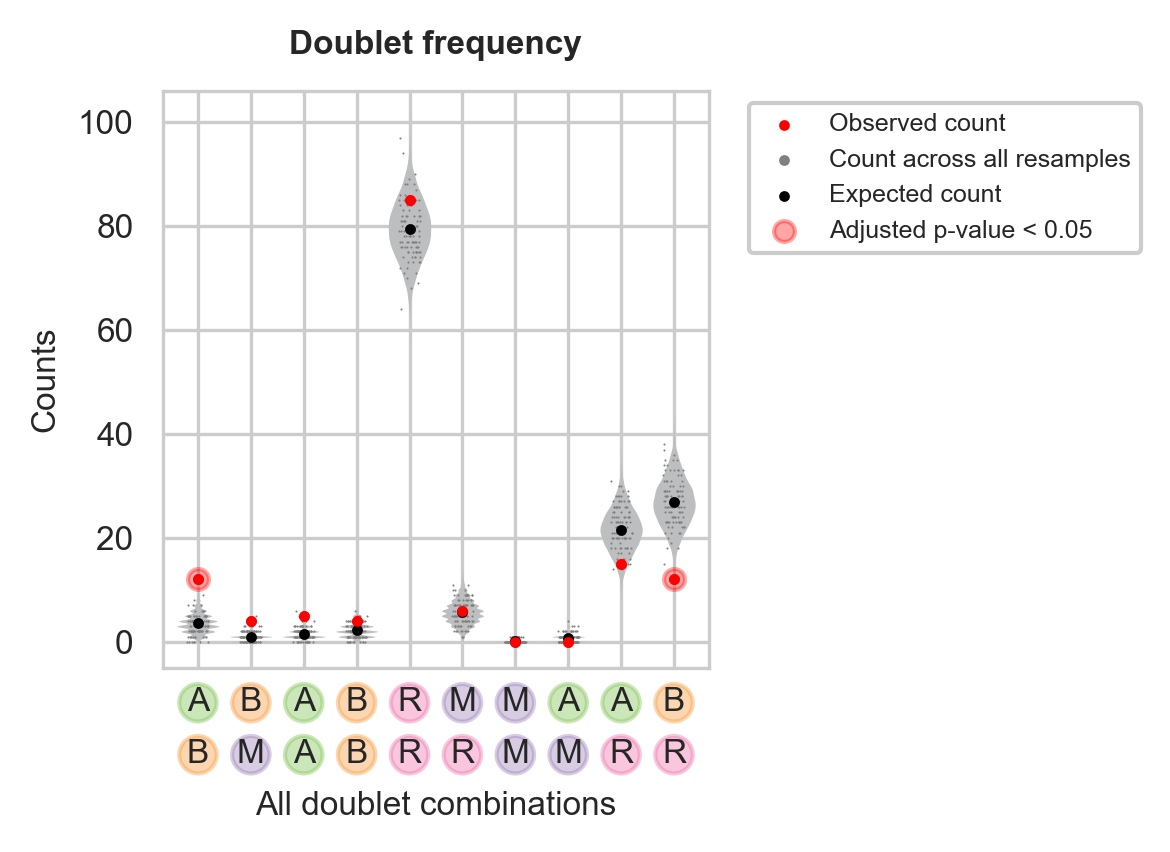

In [18]:
plot_frequency(subtree, 
               df_true_melt_subset, 
               df_melt_subset, 
               df_melt_100resamples_subset, 
               cell_color_dict,
               cutoff=cutoff, 
               legend_bool=True, 
               legend_pos='outside',
               save=False, 
               image_format='png',
               dpi=300,
               image_save_path=None)

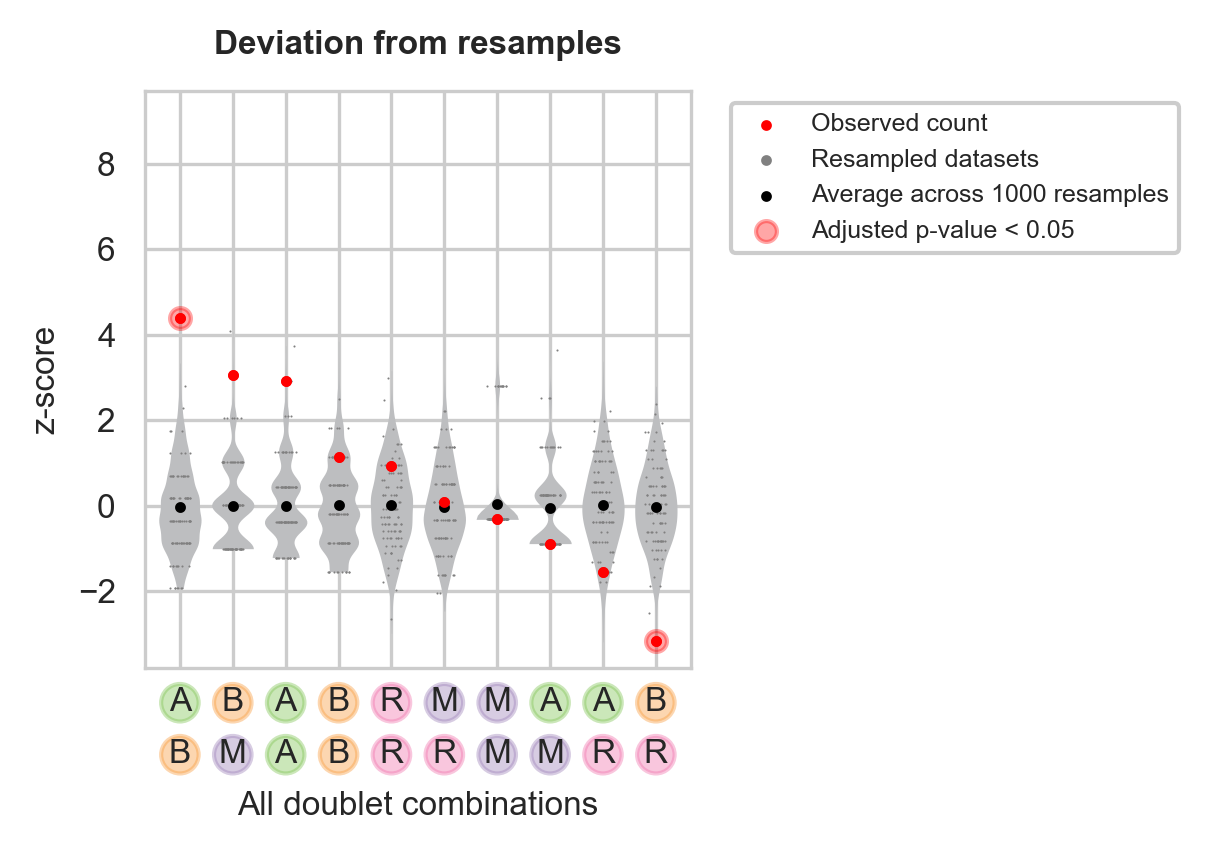

In [19]:
plot_deviation(subtree, 
               df_true_melt_subset, 
               df_zscores_i_concat_melt_subset, 
               df_zscores_i_concat_melt_100resamples_subset, 
               cell_color_dict,
               cutoff=cutoff, 
               num_null=1000,
               legend_bool=True,
               legend_pos='outside',
               save=False, 
               image_format='png',
               dpi=300,
               image_save_path=None)

## Triplet motif analysis

In [41]:
(triplet_dict, 
 cell_fates, 
 dfs_concat) = resample_trees_triplets(all_trees_sorted, 
                                       num_resamples, 
                                       True, 
                                       cell_fates='auto'
                                       )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [47]:
cutoff = 15

In [48]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_zscores_i_concat_melt_subset, 
 df_zscores_i_concat_melt_100resamples_subset) = dfs_for_plotting(dfs_concat, 
                                                                  num_resamples, 
                                                                  triplet_dict, 
                                                                  cutoff=cutoff, 
                                                                  num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [49]:
subtree = 'triplet'

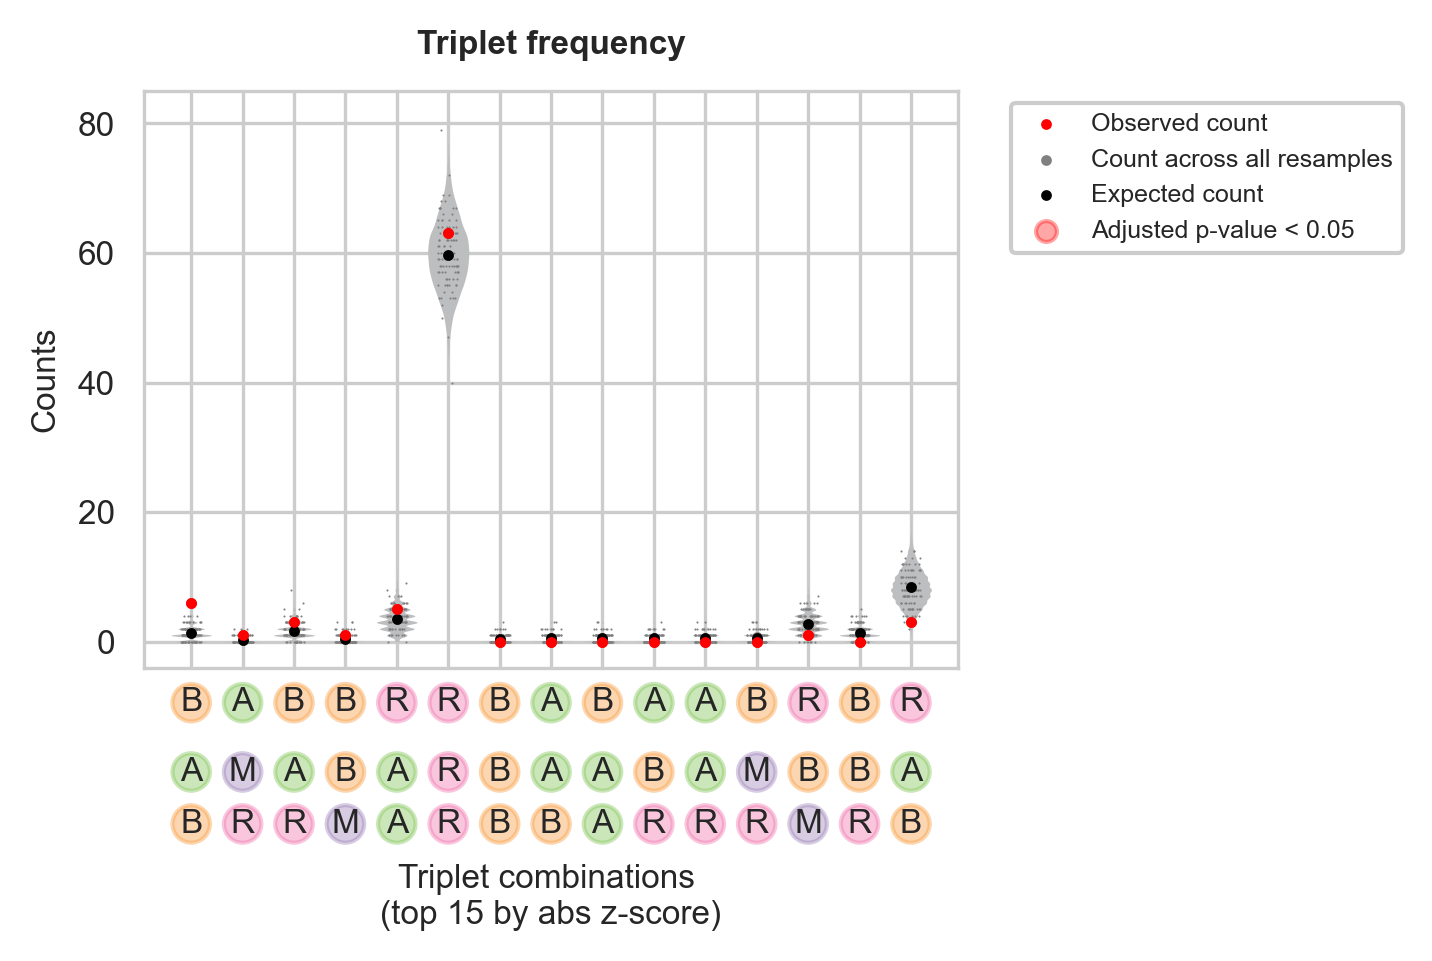

In [50]:
plot_frequency(subtree, 
               df_true_melt_subset, 
               df_melt_subset, 
               df_melt_100resamples_subset, 
               cell_color_dict,
               cutoff=cutoff, 
               legend_bool=True, 
               legend_pos='outside',
               save=False, 
               image_format='png',
               dpi=300,
               image_save_path=None)

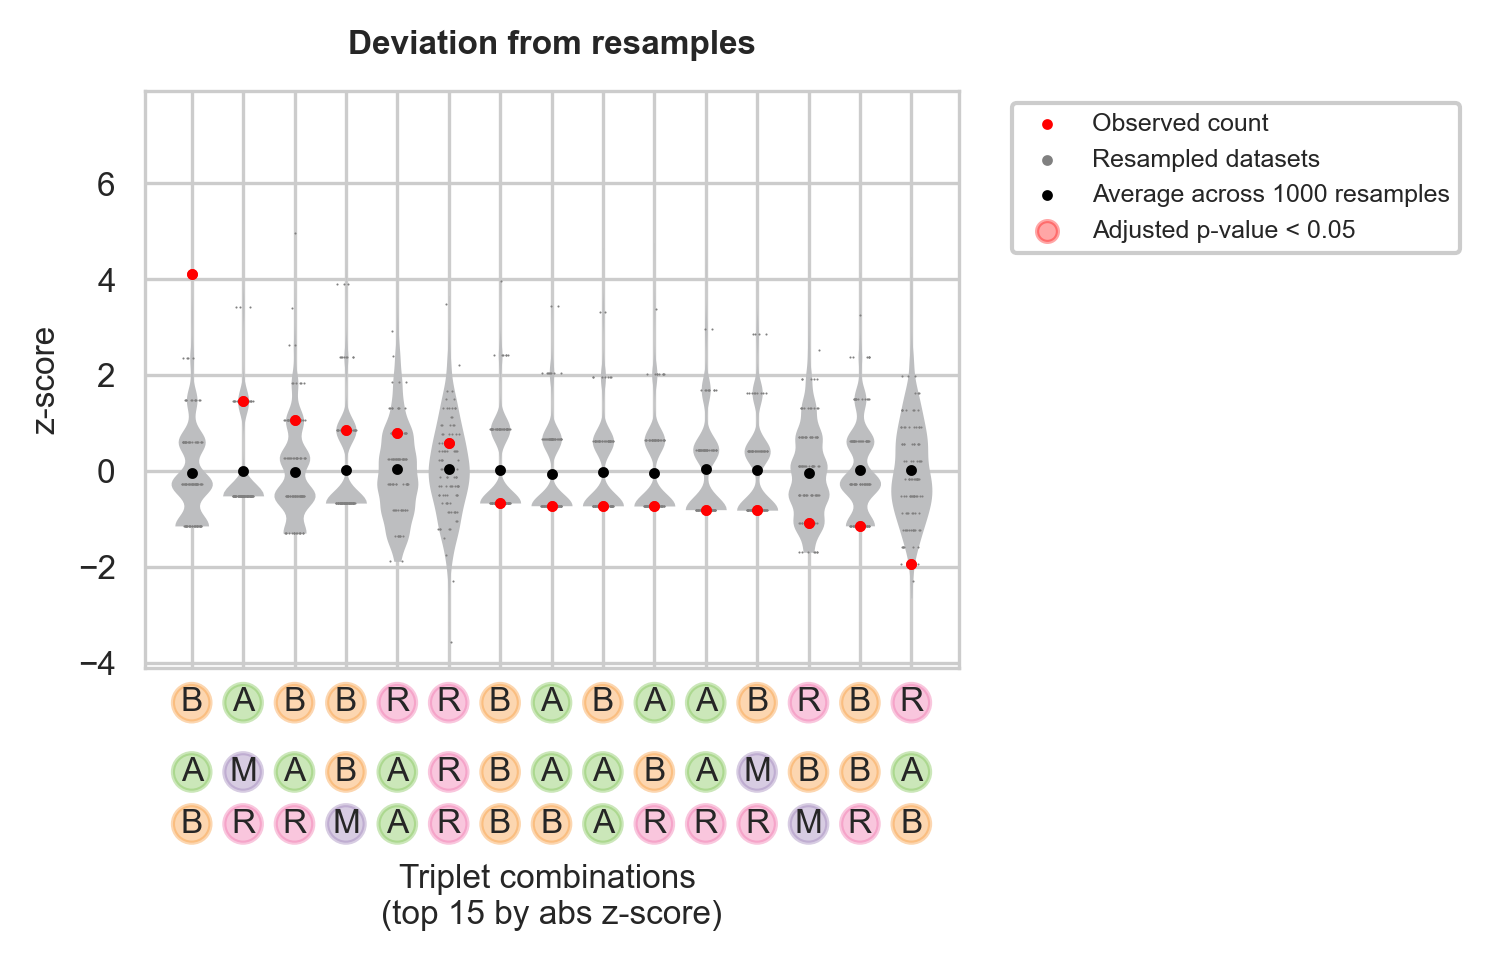

In [51]:
plot_deviation(subtree, 
               df_true_melt_subset, 
               df_zscores_i_concat_melt_subset, 
               df_zscores_i_concat_melt_100resamples_subset, 
               cell_color_dict,
               cutoff=cutoff, 
               num_null=1000,
               legend_bool=True,
               legend_pos='outside',
               save=False, 
               image_format='png',
               dpi=300,
               image_save_path=None)

## Quartet motif analysis

In [52]:
(quartet_dict, 
 cell_fates, 
 dfs_concat) = resample_trees_quartets(all_trees_sorted, 
                                       num_resamples, 
                                       True, 
                                       cell_fates='auto'
                                       )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [53]:
cutoff = 15

In [54]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_zscores_i_concat_melt_subset, 
 df_zscores_i_concat_melt_100resamples_subset) = dfs_for_plotting(dfs_concat, 
                                                                  num_resamples, 
                                                                  quartet_dict, 
                                                                  cutoff=cutoff, 
                                                                  num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [55]:
subtree = 'quartet'

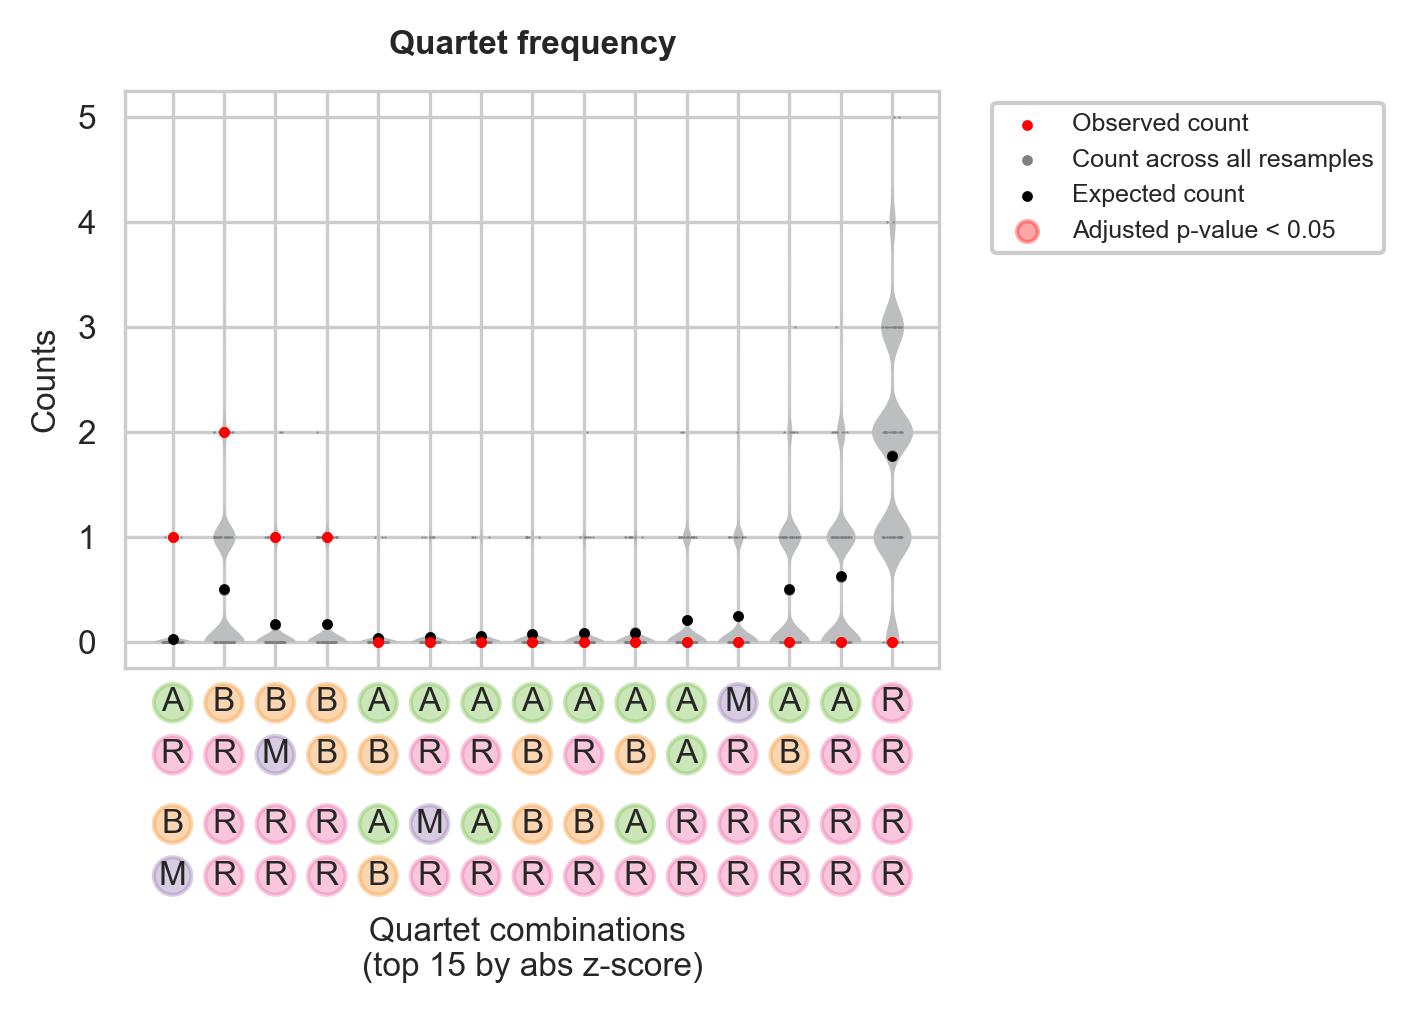

In [56]:
plot_frequency(subtree, 
               df_true_melt_subset, 
               df_melt_subset, 
               df_melt_100resamples_subset, 
               cell_color_dict,
               cutoff=cutoff, 
               legend_bool=True, 
               legend_pos='outside',
               save=False, 
               image_format='png',
               dpi=300,
               image_save_path=None)

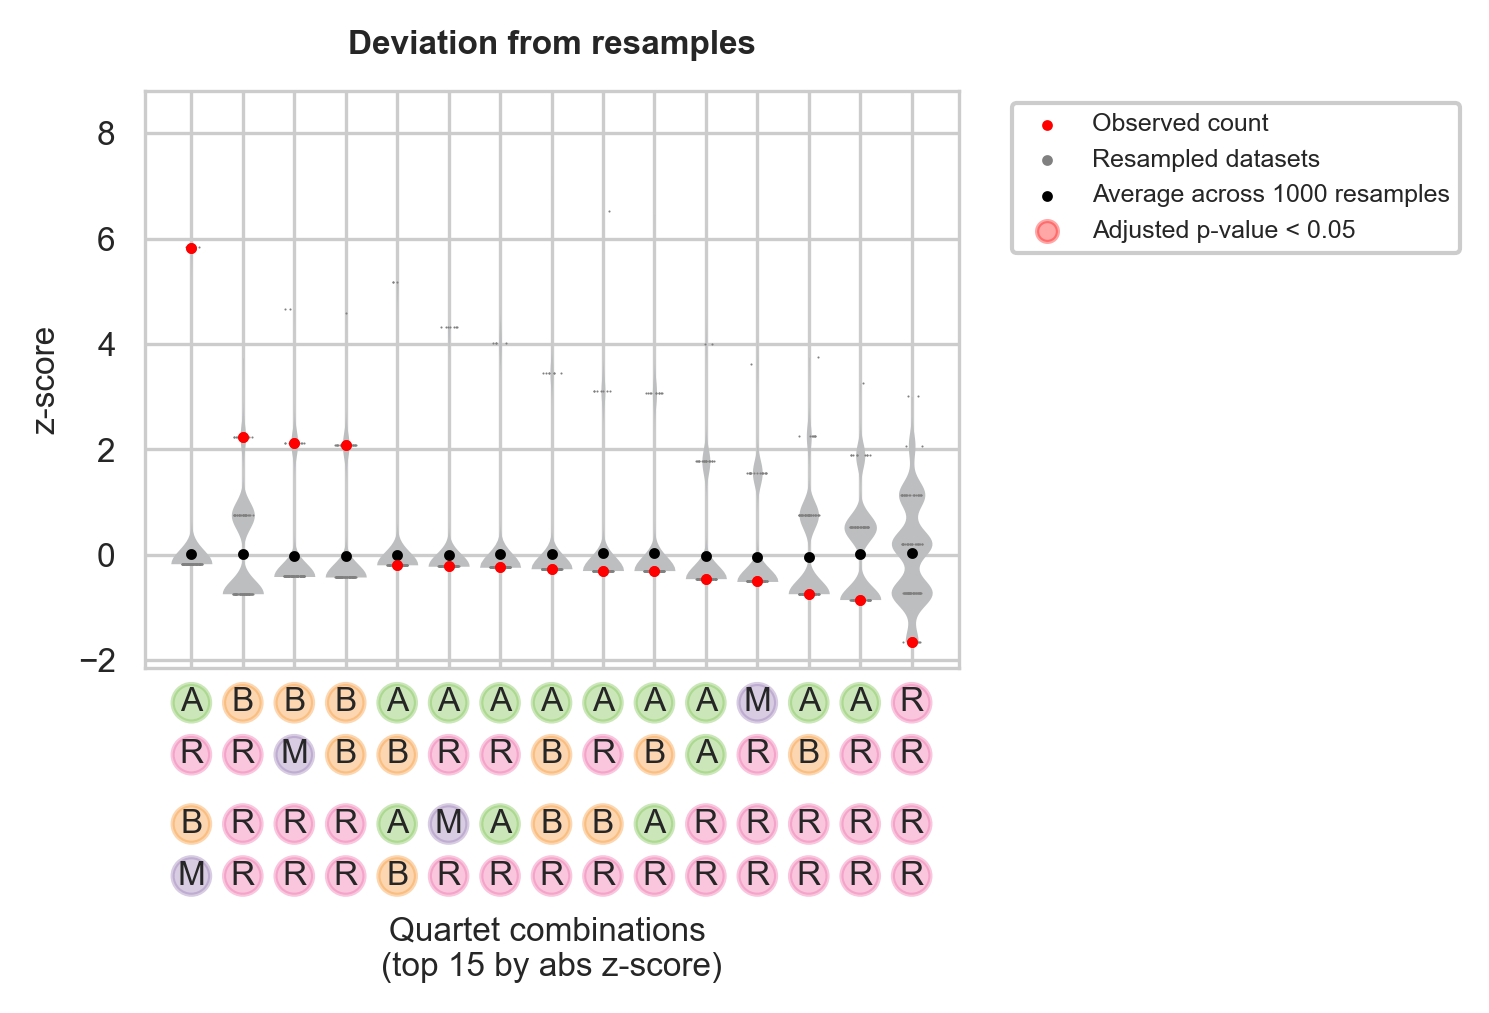

In [57]:
plot_deviation(subtree, 
               df_true_melt_subset, 
               df_zscores_i_concat_melt_subset, 
               df_zscores_i_concat_melt_100resamples_subset, 
               cell_color_dict,
               cutoff=cutoff, 
               num_null=1000,
               legend_bool=True,
               legend_pos='outside',
               save=False, 
               image_format='png',
               dpi=300,
               image_save_path=None)